# KPI's

# Initialize + Clean

In [936]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [938]:
final_demo = 'Data assets/df_final_demo.txt'
experiments_clients = 'Data assets/df_final_experiment_clients.txt'
web_1 = 'Data assets/df_final_web_data_pt_1.txt'
web_2 = 'Data assets/df_final_web_data_pt_2.txt'

# Read the text files into DataFrames
df_final = pd.read_csv(final_demo)
df_experiments = pd.read_csv(experiments_clients)
df_web_1 = pd.read_csv(web_1)
df_web_2 = pd.read_csv(web_2)

# Combine the DataFrames into one (if needed)
df_web = pd.concat([df_web_1, df_web_2], axis=0)

In [939]:
df_final['gendr'] = df_final['gendr'].replace({'X': 'U'})
df_final['gendr'] = df_final['gendr'].fillna('U')

In [940]:
df_combined = pd.merge(df_final, df_experiments, on= 'client_id').reset_index(drop = True)
df_combined.dropna(subset=['Variation'], inplace = True)
df_web.reset_index(drop=True)

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [941]:
df_combined.rename(columns={
                            'client_id': 'ClientID',
                            'clnt_tenure_yr': 'Tenure(Y)',
                            'clnt_tenure_mnth': 'Tenure(M)',
                            'clnt_age': 'Age',
                            'gendr': 'Gender',
                            'num_accts': 'Accounts(#)',
                            'bal': 'Balance',
                            'calls_6_mnth': 'Calls',
                            'logons_6_mnth': 'Logins',
                            'Variation': 'Variation'
                        }, inplace=True)

In [942]:
print(df_combined.isna().sum())

ClientID        0
Tenure(Y)      12
Tenure(M)      12
Age            13
Gender          0
Accounts(#)    12
Balance        12
Calls          12
Logins         12
Variation       0
dtype: int64


In [943]:
df_combined = df_combined.dropna()

In [944]:
# Convert columns to integers
df_combined['Tenure(Y)'] = df_combined['Tenure(Y)'].astype(int)
df_combined['Tenure(M)'] = df_combined['Tenure(M)'].astype(int)
df_combined['Accounts(#)'] = df_combined['Accounts(#)'].astype(int)
df_combined['Calls'] = df_combined['Calls'].astype(int)
df_combined['Logins'] = df_combined['Logins'].astype(int)

# Convert Age to int and round down
df_combined['Age'] = np.floor(df_combined['Age']).astype(int)

In [945]:
df_combined

,ClientID,Tenure(Y),Tenure(M),Age,Gender,Accounts(#),Balance,Calls,Logins,Variation
0,836976,6,73,60,U,2,45105.30,6,9,Test
1,2304905,7,94,58,U,2,110860.30,6,9,Control
2,1439522,5,64,32,U,2,52467.79,6,9,Test
3,1562045,16,198,49,M,2,67454.65,3,6,Test
4,5126305,12,145,33,F,2,103671.75,0,3,Control
...,...,...,...,...,...,...,...,...,...,...
50495,1780858,21,262,68,M,3,372100.59,6,9,Test
50496,6967120,21,260,68,M,3,4279873.38,6,9,Control
50497,5826160,20,249,56,F,2,44837.16,2,5,Test
50498,8739285,19,229,69,F,2,44994.24,1,4,Test


In [946]:
df_web.rename(columns={
                        'client_id': 'ClientID',
                        'visitor_id': 'visitor_id',
                        'visit_id': 'visit_id',
                        'process_step': 'process_step',
                        'date_time': 'date_time',
                    }, inplace=True)

In [951]:
df_web

,ClientID,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [957]:
df_web = df_web.drop_duplicates(subset=['ClientID', 'visit_id', 'date_time'], keep='first')

# Initial Client behavior analysis

## Test vs. Control

In [961]:
df_combined_var = df_combined['Variation'].value_counts()

/var/folders/0d/nrxf3dnx3jq4b9fj3db32zgr0000gn/T/ipykernel_82413/508863236.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_combined_var .index, y=df_combined_var .values, palette="Set3");


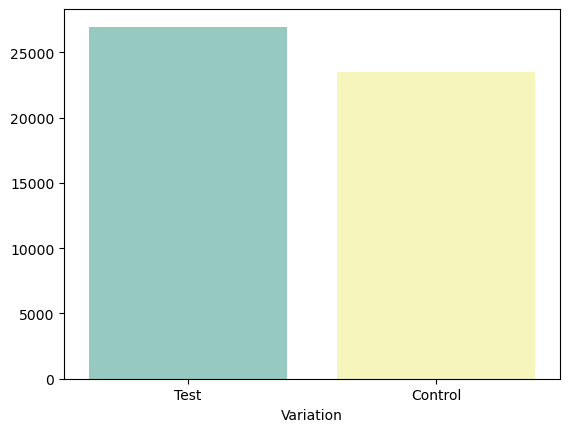

In [962]:
sns.barplot(x=df_combined_var .index, y=df_combined_var .values, palette="Set3");

<Axes: ylabel='count'>

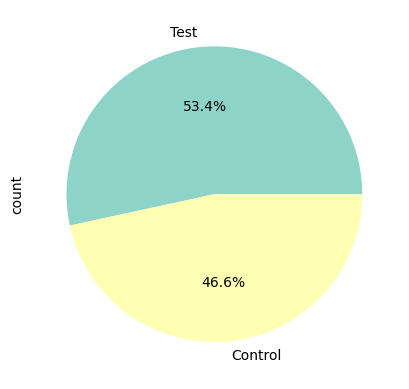

In [963]:
df_combined_var.plot.pie(autopct='%1.1f%%', startangle=360, colors=sns.color_palette("Set3"))

## Clients Ages

In [965]:
bins = [0, 20, 40, 60, df_combined['Age'].max()]
labels = ['0 - 20', '21 - 40', '41 - 60', '60+']
df_combined_cat_added = pd.cut(df_combined['Age'], bins=bins, labels=labels, include_lowest=True)
df_combined_cat_added = df_combined_cat_added.value_counts()

/var/folders/0d/nrxf3dnx3jq4b9fj3db32zgr0000gn/T/ipykernel_82413/274807169.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_combined_cat_added.index, y=df_combined_cat_added.values, palette="Set3");


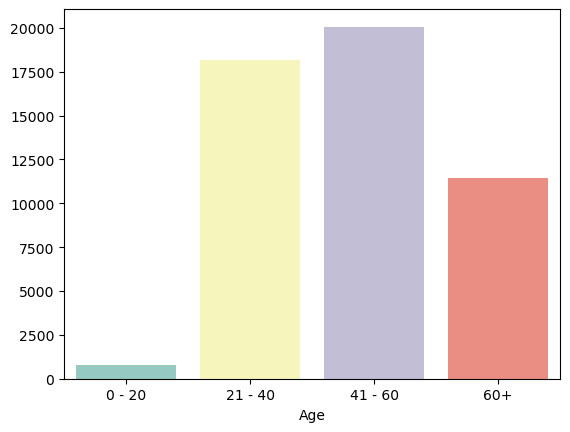

In [967]:
sns.barplot(x=df_combined_cat_added.index, y=df_combined_cat_added.values, palette="Set3");

## Clients Sex

In [972]:
df_combined_gendr_cat = df_combined['Gender'].value_counts()

/var/folders/0d/nrxf3dnx3jq4b9fj3db32zgr0000gn/T/ipykernel_82413/3868163362.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_combined_gendr_cat.index, y=df_combined_gendr_cat.values, palette="Set3");


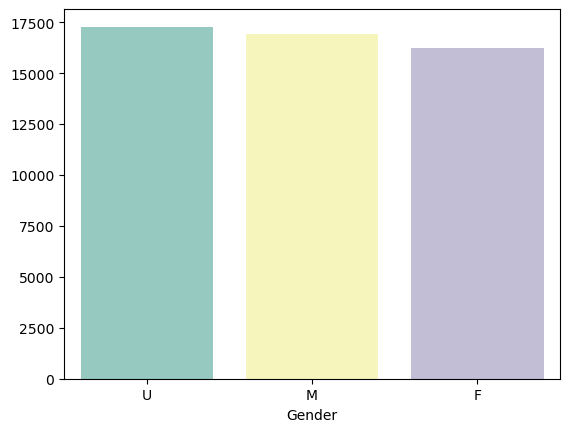

In [974]:
sns.barplot(x=df_combined_gendr_cat.index, y=df_combined_gendr_cat.values, palette="Set3");

## Clients Tenure

In [977]:
df_combined['Tenure(Y)'].describe()

count    50487.000000
mean        12.031810
std          6.860326
min          2.000000
25%          6.000000
50%         11.000000
75%         16.000000
max         55.000000
Name: Tenure(Y), dtype: float64

In [979]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, df_combined['Tenure(Y)'].max()]
labels = ['up to 5', '6 - 10', '11 - 15', '16 - 20', '21 - 25', '26 - 30', '31 - 35', '36 - 40', '41+']
df_tenure_cat = pd.cut(df_combined['Tenure(Y)'], bins=bins, labels=labels, include_lowest=True)
df_tenure_cat = df_tenure_cat.value_counts()

In [981]:
df_tenure_cat

Tenure(Y)
6 - 10     15975
11 - 15    13109
up to 5     8729
16 - 20     5710
21 - 25     4487
26 - 30     1762
31 - 35      570
36 - 40       93
41+           52
Name: count, dtype: int64

/var/folders/0d/nrxf3dnx3jq4b9fj3db32zgr0000gn/T/ipykernel_82413/3156780658.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_tenure_cat.index, y=df_tenure_cat.values, palette="Set3");


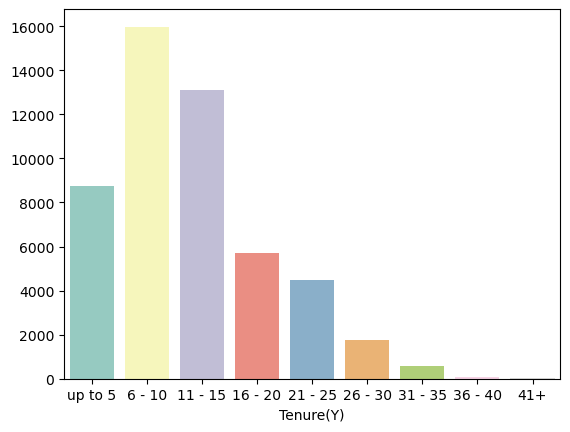

In [983]:
sns.barplot(x=df_tenure_cat.index, y=df_tenure_cat.values, palette="Set3");

# Performance Metrics

## Completion Rate:

In [989]:
df_web = df_web.merge(df_combined[['ClientID', 'Variation']], on='ClientID', how='inner')

In [990]:
# Calculate for 'Test' group
total_clients_test = df_test['ClientID'].nunique()
confirm_clients_test = df_test[df_test['process_step'] == 'confirm']['ClientID'].nunique()

completion_rate_test = pd.DataFrame({
    'Total Clients': [total_clients_test],
    'Clients Reached Confirm': [confirm_clients_test]
})

percentage_reached_confirm_test = (confirm_clients_test / total_clients_test) * 100
completion_rate_test['Percentage of Clients Reached Confirm'] = [f'{percentage_reached_confirm_test:.2f}%']

# Add variation column to the 'Test' group
completion_rate_test['Variation'] = 'Test'

# Calculate for 'Control' group
total_clients_control = df_control['ClientID'].nunique()
confirm_clients_control = df_control[df_control['process_step'] == 'confirm']['ClientID'].nunique()

completion_rate_control = pd.DataFrame({
    'Total Clients': [total_clients_control],
    'Clients Reached Confirm': [confirm_clients_control]
})

percentage_reached_confirm_control = (confirm_clients_control / total_clients_control) * 100
completion_rate_control['Percentage of Clients Reached Confirm'] = [f'{percentage_reached_confirm_control:.2f}%']

# Add variation column to the 'Control' group
completion_rate_control['Variation'] = 'Control'

# Show the dataframes
completion_rate_test

,Total Clients,Clients Reached Confirm,Percentage of Clients Reached Confirm,Variation
0,26961,18664,69.23%,Test


In [991]:
completion_rate_control

,Total Clients,Clients Reached Confirm,Percentage of Clients Reached Confirm,Variation
0,23526,15338,65.20%,Control


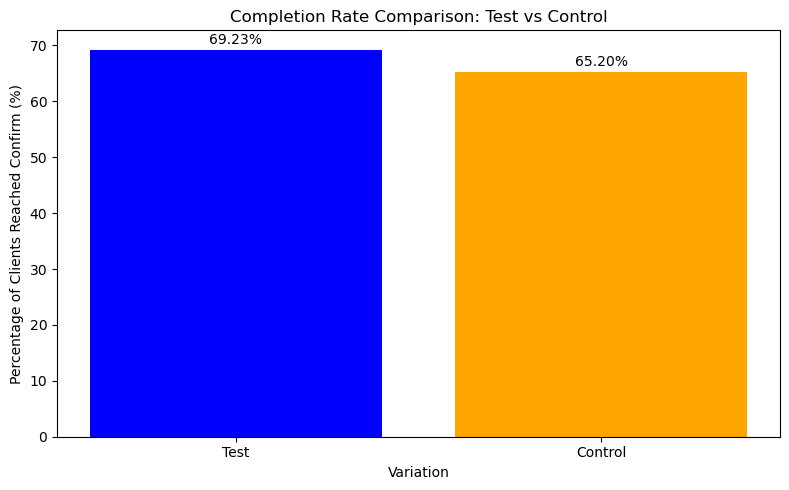

In [995]:
# Combine both DataFrames for easy plotting
combined_data = pd.concat([completion_rate_test, completion_rate_control])

# Plotting
plt.figure(figsize=(8, 5))

# Create bar graph
bars = plt.bar(combined_data['Variation'], combined_data['Percentage of Clients Reached Confirm'].str.rstrip('%').astype('float'), color=['blue', 'orange'])

# Add labels and title
plt.xlabel('Variation')
plt.ylabel('Percentage of Clients Reached Confirm (%)')
plt.title('Completion Rate Comparison: Test vs Control')

# Display the values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height:.2f}%', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

## Time Spent on Each Step

In [1061]:
# Ensure that 'date_time' is in datetime format
df_web['date_time'] = pd.to_datetime(df_web['date_time'])

# Sort by ClientID, visit_id, and date_time
df_web = df_web.sort_values(by=['ClientID', 'visit_id', 'date_time'])

# Group process steps into categories
step_mapping = {
    'start': 'start',    # Assuming 'step_1' is the start category
    'step_1': 'step_1',
    'step_2': 'step_2',
    'step_3': 'step_3',
    'confirm': 'confirm'   # You can adjust these mappings based on your data
}

# Apply the mapping to the 'process_step' column
df_web['process_step'] = df_web['process_step'].map(step_mapping)

# Calculate the time difference between consecutive rows (steps)
df_web['time_diff'] = df_web.groupby(['ClientID', 'visit_id'])['date_time'].diff()

# Convert time difference to minutes
df_web['time_diff_minutes'] = round(df_web['time_diff'].dt.total_seconds() / 60, 2)

# Now, sum the time differences for each category ('process_step') by client_id and variation
time_summary = df_web.groupby(['ClientID', 'Variation', 'process_step'])['time_diff_minutes'].sum().reset_index()

# Pivot to have process_step as columns and ClientID as index
df_web_time_spent = time_summary.pivot_table(index='ClientID', columns='process_step', values='time_diff_minutes', aggfunc='sum')

# Add Variation column back to the DataFrame
df_web_time_spent = df_web_time_spent.reset_index()
df_web_time_spent = df_web_time_spent.merge(df_web[['ClientID', 'Variation']].drop_duplicates(), on='ClientID', how='left')

# Ensure the desired process steps are present and in the correct order
df_web_time_spent = df_web_time_spent[['ClientID', 'Variation', 'step_1', 'step_2', 'step_3', 'confirm']]

# Calculate the total time per ClientID
df_web_time_spent['total_time'] = df_web_time_spent[['step_1', 'step_2', 'step_3', 'confirm']].sum(axis=1)

# Fill any missing values with 0
df_web_time_spent = df_web_time_spent.fillna(0)

# Show the resulting DataFrame
df_web_time_spent

,ClientID,Variation,step_1,step_2,step_3,confirm,total_time
0,555,Test,0.12,0.53,1.65,0.33,2.63
1,647,Test,0.12,0.30,3.15,2.72,6.29
2,934,Test,0.00,0.00,0.00,0.00,0.00
3,1028,Control,4.20,0.18,4.58,0.00,8.96
4,1104,Control,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...
50482,9999150,Test,0.10,0.00,0.00,0.00,0.10
50483,9999400,Test,0.37,0.45,0.77,0.40,1.99
50484,9999626,Test,0.13,0.00,0.00,0.00,0.13
50485,9999729,Test,1.70,4.95,0.65,0.35,7.65


In [1065]:
# Filter DataFrames for 'Test' and 'Control' groups
df_test_time = df_web_time_spent[df_web_time_spent['Variation'] == 'Test']
df_control_time = df_web_time_spent[df_web_time_spent['Variation'] == 'Control']

# Calculate average time spent for 'Test' group
average_time_per_step_test = df_test_time[['step_1', 'step_2', 'step_3', 'confirm']].mean()

# Create a DataFrame for 'Test' group
average_time_spent_test = pd.DataFrame({
    'Average Time': average_time_per_step_test
})
average_time_spent_test['Variation'] = 'Test'

# Calculate average time spent for 'Control' group
average_time_per_step_control = df_control_time[['step_1', 'step_2', 'step_3', 'confirm']].mean()

# Create a DataFrame for 'Control' group
average_time_spent_control = pd.DataFrame({
    'Average Time': average_time_per_step_control
})
average_time_spent_control['Variation'] = 'Control'

# Combine both DataFramesdf_web_time_spent
average_time_spent_combined = pd.concat([average_time_spent_test, average_time_spent_control])

# Show the resulting DataFrame
average_time_spent_combined

,Average Time,Variation
step_1,0.896191,Test
step_2,0.916725,Test
step_3,1.533908,Test
confirm,1.777454,Test
step_1,0.894871,Control
step_2,0.705861,Control
step_3,1.489183,Control
confirm,1.525230,Control


## Error Steps

In [1005]:
df_web = df_web.sort_values(by=['ClientID', 'visit_id', 'date_time'])

In [1007]:
# Correct order of steps
process_steps = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Create a dictionary to map each step to its index
step_index = {step: i for i, step in enumerate(process_steps)}

In [1009]:
# Compare each step with the previous one for each client and visit
df_web['prev_step'] = df_web.groupby(['ClientID', 'visit_id'])['process_step'].shift(1)

# Flag backward steps (error: when the previous step index is greater than the current step index)
df_web['error_flag'] = df_web.apply(
    lambda x: step_index.get(x['process_step'], -1) < step_index.get(x['prev_step'], -1) 
    if pd.notnull(x['prev_step']) else False, axis=1
)

In [1010]:
# Count errors per process step for 'Test' group
step_error_counts_test = df_test.groupby('process_step')['error_flag'].sum().reset_index()

# Add 'Variation' column to identify the group
step_error_counts_test['Variation'] = 'Test'

# Count errors per process step for 'Control' group
step_error_counts_control = df_control.groupby('process_step')['error_flag'].sum().reset_index()

step_error_counts_control['Variation'] = 'Control'

In [1011]:
step_error_counts_test

,process_step,error_flag,Variation
0,confirm,0,Test
1,start,10510,Test
2,step_1,3364,Test
3,step_2,2249,Test
4,step_3,5,Test


In [1012]:
step_error_counts_control

,process_step,error_flag,Variation
0,confirm,0,Control
1,start,4808,Control
2,step_1,2296,Control
3,step_2,2301,Control
4,step_3,1,Control
